In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [3]:
DATA_FILE = "../DATA/BTCUSD2021-08-31.csv.gz"

df = pd.read_csv(DATA_FILE, index_col=0)

df.index = pd.to_datetime(df.index*1_000_000_000)
# df.set_index('timestamp')

df

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
timestamp,,,,,,,,,
2021-08-31 23:59:59.368999936,BTCUSD,Sell,63525,47177.0,MinusTick,6d9f8a12-788a-5f4c-9686-282084d9917e,134652478.0,63525,1.346525
2021-08-31 23:59:57.556000000,BTCUSD,Buy,1,47177.5,ZeroMinusTick,e947e254-3bca-56b0-a300-93e9fedfb5b3,2119.0,1,0.000021
2021-08-31 23:59:57.555000064,BTCUSD,Buy,1,47177.5,PlusTick,39c67b5c-ef63-5c49-874f-33d9f08a3ced,2119.0,1,0.000021
2021-08-31 23:59:57.499000064,BTCUSD,Sell,1,47177.0,MinusTick,20be49ee-fdb1-577f-9fdb-c5d2a76fcd81,2119.0,1,0.000021
2021-08-31 23:59:57.499000064,BTCUSD,Sell,1000,47178.5,PlusTick,93357df4-4a39-5fa9-93d2-ee2111d27957,2119609.0,1000,0.021196
...,...,...,...,...,...,...,...,...,...
2021-08-31 00:00:00.332000000,BTCUSD,Sell,50000,46992.5,ZeroMinusTick,29368f9d-391f-5fcd-b494-6186f2f5a740,106399957.0,50000,1.064000
2021-08-31 00:00:00.168999936,BTCUSD,Sell,171270,46992.5,ZeroMinusTick,5aa1100d-cd9b-52e1-8825-069201d805bc,364462414.0,171270,3.644624
2021-08-31 00:00:00.168999936,BTCUSD,Sell,108000,46992.5,ZeroMinusTick,b5f666f7-cd59-5f20-ac43-a05c87465f1e,229823908.0,108000,2.298239


In [4]:
df.describe()

,size,price,grossValue,homeNotional,foreignNotional
count,756617.000000,756617.000000,7.566170e+05,756617.000000,756617.000000
mean,6360.802508,47415.148175,1.340557e+07,6360.802508,0.134056
std,23411.113102,374.611364,4.932786e+07,23411.113102,0.493279
min,1.000000,46712.000000,2.069000e+03,1.000000,0.000021
25%,6.000000,47118.000000,1.267300e+04,6.000000,0.000127
50%,296.000000,47374.500000,6.227940e+05,296.000000,0.006228
75%,3000.000000,47732.000000,6.321645e+06,3000.000000,0.063216
max,930088.000000,48323.000000,1.946809e+09,930088.000000,19.468090


In [5]:
buy_df = df[df["side"] == "Buy"]
buy_df.describe()

,size,price,grossValue,homeNotional,foreignNotional
count,374738.000000,374738.000000,3.747380e+05,374738.000000,374738.000000
mean,6450.958510,47438.948018,1.359554e+07,6450.958510,0.135955
std,23639.001251,376.950816,4.979388e+07,23639.001251,0.497939
min,1.000000,46712.500000,2.069000e+03,1.000000,0.000021
25%,5.000000,47136.000000,1.066400e+04,5.000000,0.000107
50%,300.000000,47392.000000,6.326570e+05,300.000000,0.006327
75%,3000.000000,47766.500000,6.342494e+06,3000.000000,0.063425
max,930088.000000,48323.000000,1.946809e+09,930088.000000,19.468090


In [6]:
sell_df = df[df["side"] == "Sell"]
sell_df.describe()


,size,price,grossValue,homeNotional,foreignNotional
count,381879.000000,381879.000000,3.818790e+05,381879.000000,381879.000000
mean,6272.332391,47391.793381,1.321915e+07,6272.332391,0.132192
std,23184.999168,370.819885,4.886559e+07,23184.999168,0.488656
min,1.000000,46712.000000,2.069000e+03,1.000000,0.000021
25%,7.000000,47100.000000,1.481000e+04,7.000000,0.000148
50%,272.000000,47355.000000,5.736170e+05,272.000000,0.005736
75%,3000.000000,47684.000000,6.293134e+06,3000.000000,0.062931
max,886540.000000,48314.000000,1.854686e+09,886540.000000,18.546862


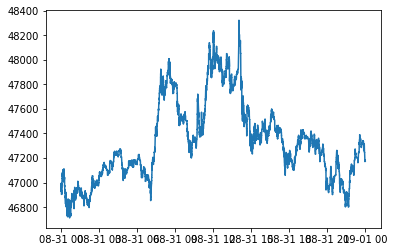

In [7]:
fig = plt.figure()

x1 = df.index
price = df['price']

plt.plot(x1, price, label="exec")

plt.show()


In [17]:
edgedf = pd.read_csv("../DATA/BTCUSD2021-08-31.edge.csv.gz", index_col=0)

edgedf.index = pd.to_datetime(edgedf.index * 1_000)



edgedf

,buyprice,buyedge,sellprice,selledge
timestamp,,,,
2021-08-31 00:00:00.813,46993.5,46993.0,46903.5,46992.5
2021-08-31 00:00:05.173,46993.5,46993.0,46903.5,46992.0
2021-08-31 00:00:05.177,46993.5,46993.0,46903.5,46991.5
2021-08-31 00:00:05.539,46993.5,46991.5,46903.5,46991.0
2021-08-31 00:00:05.978,46994.0,46991.5,46903.5,46991.0
...,...,...,...,...
2021-08-31 23:54:10.809,47315.0,47299.5,47171.0,47299.0
2021-08-31 23:54:16.015,47315.0,47305.0,47171.0,47304.5
2021-08-31 23:54:16.268,47315.0,47307.0,47171.0,47304.5


In [29]:
edgedf.columns

Index([' buyprice', ' buyedge', ' sellprice', ' selledge'], dtype='object')

In [30]:
df.columns

Index(['symbol', 'side', 'size', 'price', 'tickDirection', 'trdMatchID',
       'grossValue', 'homeNotional', 'foreignNotional'],
      dtype='object')

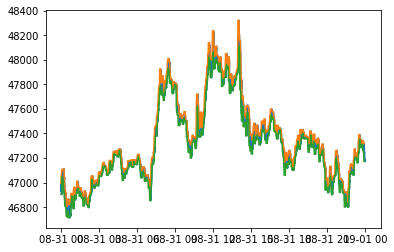

In [35]:


fig = plt.figure()

x1 = df.index
price = df['price']

x2 = edgedf.index
eprice = edgedf[' buyprice']
sprice = edgedf[' sellprice']

plt.plot(x1, price, label="exec")
plt.plot(x2, eprice, label='buy edge')
plt.plot(x2, sprice, label='sell edge')

plt.show()



約定価格の決定ロジック

* 直近価格を取り出す
* taker  同一サイドの1tick先
* maker  反対サイドの2tick先

In [8]:
exec_head = df.head(10)

exec_head







,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,2021-09-06 23:59:56.832000000,BTCUSD,Sell,400,52716.5,MinusTick,8104a331-0a7b-5d82-b3d6-cfcf26fea382,758775.0,400,0.007588
1,2021-09-06 23:59:56.731000064,BTCUSD,Buy,103,52717.0,ZeroMinusTick,b4b13636-f1aa-5cff-9900-7fb6531eab8c,195382.0,103,0.001954
2,2021-09-06 23:59:55.036000000,BTCUSD,Buy,16881,52717.0,ZeroMinusTick,732cd030-7200-576f-bacb-223d06c78ed5,32021928.0,16881,0.320219
3,2021-09-06 23:59:55.024000000,BTCUSD,Buy,7547,52717.0,ZeroMinusTick,4d3bf70b-8789-50b3-a750-2b66df8677c1,14316065.0,7547,0.143161
4,2021-09-06 23:59:55.024000000,BTCUSD,Buy,1,52717.0,ZeroMinusTick,0818d94d-e25f-5dd1-9dc6-0c4a0998576e,1896.0,1,0.000019
5,2021-09-06 23:59:55.024000000,BTCUSD,Buy,10839,52717.0,PlusTick,78875386-0c11-54d3-9c9f-25880d7af024,20560729.0,10839,0.205607
6,2021-09-06 23:59:54.664000000,BTCUSD,Sell,3000,52716.5,ZeroMinusTick,6ac21909-7ac8-5903-9510-7252f4441153,5690817.0,3000,0.056908
7,2021-09-06 23:59:52.834000128,BTCUSD,Sell,1,52716.5,ZeroMinusTick,ed5c8ab3-f108-5776-a302-a0f59f58d01d,1896.0,1,0.000019
8,2021-09-06 23:59:52.815000064,BTCUSD,Sell,1,52716.5,ZeroMinusTick,be69b186-e852-5c9f-bb06-06ab9026b4a8,1896.0,1,0.000019
9,2021-09-06 23:59:52.792999936,BTCUSD,Sell,10,52716.5,ZeroMinusTick,d61c7e08-ee42-5b38-b90c-a7899a7effca,18969.0,10,0.000190


In [9]:
first_rec = df[df["side"]=="Sell"].head(1)
sell_price = float(first_rec["price"])
sell_time = first_rec["timestamp"]



In [10]:
first_rec = df[df["side"]=="Buy"].head(1)
buy_price = float(first_rec["price"])
buy_time = first_rec["timestamp"]

In [11]:
print(sell_time, sell_price)
print(buy_time, buy_price)

0   2021-09-06 23:59:56.832
Name: timestamp, dtype: datetime64[ns] 52716.5
1   2021-09-06 23:59:56.731000064
Name: timestamp, dtype: datetime64[ns] 52717.0



* 売り板が薄い時はスリップする可能性がある。 <-正確な値は板情報がないと出ない。
* 逆行の勢いがある場合は約定しない。　←　約定データから計算できる。



In [12]:
TICK = 0.5
taker_buy = buy_price + TICK * 2
maker_buy = sell_price + TICK * 2

maker_buy

52717.5

In [13]:
# check exec is done?

df[(df["price"]<=maker_buy) & (df["side"] == "Sell")]


,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
0,2021-09-06 23:59:56.832000000,BTCUSD,Sell,400,52716.5,MinusTick,8104a331-0a7b-5d82-b3d6-cfcf26fea382,758775.0,400,0.007588
6,2021-09-06 23:59:54.664000000,BTCUSD,Sell,3000,52716.5,ZeroMinusTick,6ac21909-7ac8-5903-9510-7252f4441153,5690817.0,3000,0.056908
7,2021-09-06 23:59:52.834000128,BTCUSD,Sell,1,52716.5,ZeroMinusTick,ed5c8ab3-f108-5776-a302-a0f59f58d01d,1896.0,1,0.000019
8,2021-09-06 23:59:52.815000064,BTCUSD,Sell,1,52716.5,ZeroMinusTick,be69b186-e852-5c9f-bb06-06ab9026b4a8,1896.0,1,0.000019
9,2021-09-06 23:59:52.792999936,BTCUSD,Sell,10,52716.5,ZeroMinusTick,d61c7e08-ee42-5b38-b90c-a7899a7effca,18969.0,10,0.000190
...,...,...,...,...,...,...,...,...,...,...
520967,2021-09-06 00:00:00.582000128,BTCUSD,Sell,100,51834.0,ZeroMinusTick,d828f400-f5d9-54b1-afbe-7c0f5b80bb88,192923.0,100,0.001929
520968,2021-09-06 00:00:00.582000128,BTCUSD,Sell,30,51834.0,ZeroMinusTick,8dc1b293-5236-5152-a863-ed2419adba29,57877.0,30,0.000579
520969,2021-09-06 00:00:00.582000128,BTCUSD,Sell,45000,51834.0,ZeroMinusTick,534fce91-bcdb-50d8-9c7d-9f7e79d6e69d,86815603.0,45000,0.868156
520970,2021-09-06 00:00:00.582000128,BTCUSD,Sell,295,51834.0,ZeroMinusTick,2e57b8b7-ab2c-5a2b-9521-19c772daf77f,569124.0,295,0.005691


## 正規性の検定
変動率が正規分布に従うかを検証する。

### 変動率の計算

In [14]:
df.dtypes

timestamp          datetime64[ns]
symbol                     object
side                       object
size                        int64
price                     float64
tickDirection              object
trdMatchID                 object
grossValue                float64
homeNotional                int64
foreignNotional           float64
dtype: object

In [28]:

price = df['timestamp']
price.resample('1T')






KeyError: 'timestamp'

In [37]:
tick = df['price'].resample('T').mean()
tick



timestamp
2021-09-06 00:00:00    51837.668033
2021-09-06 00:01:00    51837.953409
2021-09-06 00:02:00    51805.671933
2021-09-06 00:03:00    51823.427419
2021-09-06 00:04:00    51849.858407
                           ...     
2021-09-06 23:55:00    52695.458904
2021-09-06 23:56:00    52709.338889
2021-09-06 23:57:00    52724.806452
2021-09-06 23:58:00    52721.353448
2021-09-06 23:59:00    52715.143885
Freq: T, Name: price, Length: 1440, dtype: float64

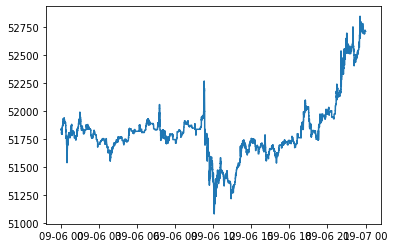

In [38]:
fig = plt.figure()

x1 = df.index
price = df['price']

plt.plot(x1, price, label="exec")

plt.show()


In [53]:

price_diff =df['price'].resample('1T').mean().diff()

price_diff

timestamp
2021-09-06 00:00:00          NaN
2021-09-06 00:01:00     0.285376
2021-09-06 00:02:00   -32.281476
2021-09-06 00:03:00    17.755486
2021-09-06 00:04:00    26.430988
                         ...    
2021-09-06 23:55:00     2.164032
2021-09-06 23:56:00    13.879985
2021-09-06 23:57:00    15.467563
2021-09-06 23:58:00    -3.453003
2021-09-06 23:59:00    -6.209563
Freq: T, Name: price, Length: 1440, dtype: float64

In [51]:
fig = plt.figure()

x1 = df.index
price = price_diff['price']

plt.plot(x1, price, label="exec")

plt.show()


KeyError: 'price'

<Figure size 432x288 with 0 Axes>

In [43]:
price_diff.describe()

count    1439.000000
mean        0.609782
std        22.174448
min      -184.380874
25%        -5.299029
50%         0.030688
75%         7.698042
max       194.330956
Name: price, dtype: float64

価格の分布

In [ ]:
data = np.array(df['price'])

fig = plt.figure()
plt.hist(data, bins=30)
plt.show()
#%

価格の*差分*分布

In [49]:
diff_df = df.diff()

data = np.array(diff_df['price'])

fig = plt.figure()
plt.hist(data, bins=30)
plt.show()
#%


TypeError: unsupported operand type(s) for -: 'str' and 'str'